In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
data = pd.read_csv('../datafiles/tsdata.csv', parse_dates=['date'], index_col = 'date')
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 204 entries, 1991-07-01 to 2008-06-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   value   204 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


In [53]:
data

,value
date,
1991-07-01,3.526591
1991-08-01,3.180891
1991-09-01,3.252221
1991-10-01,3.611003
1991-11-01,3.565869
...,...
2008-02-01,21.654285
2008-03-01,18.264945
2008-04-01,23.107677


# Decomposition of time series

In [4]:
from statsmodels.tsa.seasonal import seasonal_decompose

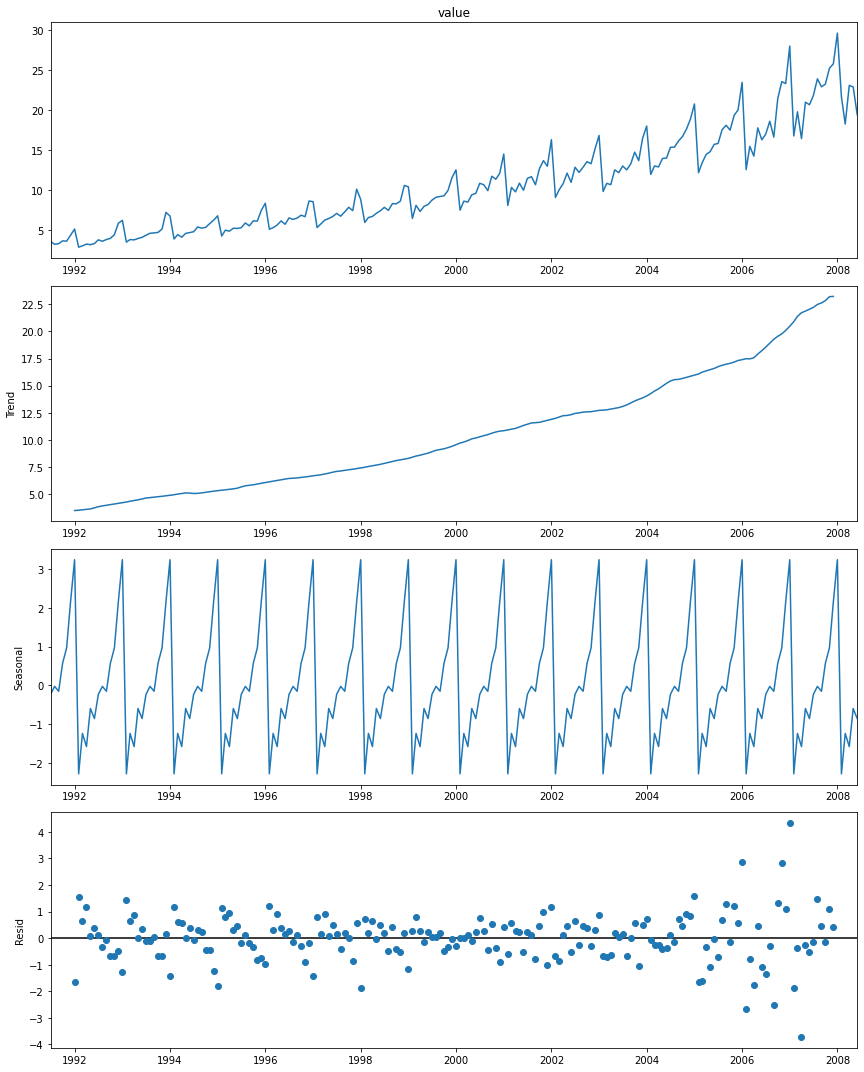

In [5]:
plt.rcParams.update({'figure.figsize':(12,15)})
result = seasonal_decompose(data['value'])
result.plot()
plt.show()

In [15]:
from statsmodels.tsa.stattools import adfuller

In [18]:
#The Augmented Dickey-Fuller test can be used to test if time series is stationary or not
results = adfuller(data['value'])
print("pvalue:" , results[1])

# p value > .05 means time series is not stationary

pvalue: 1.0


In [19]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

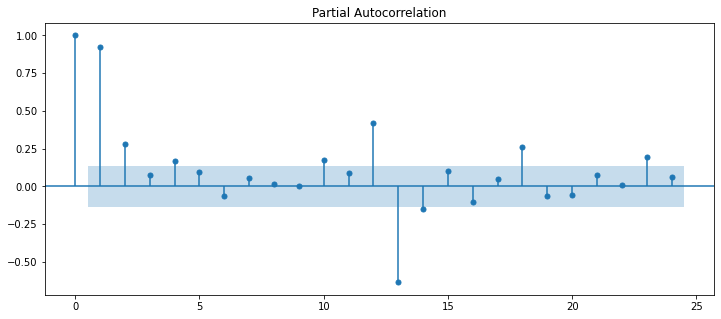

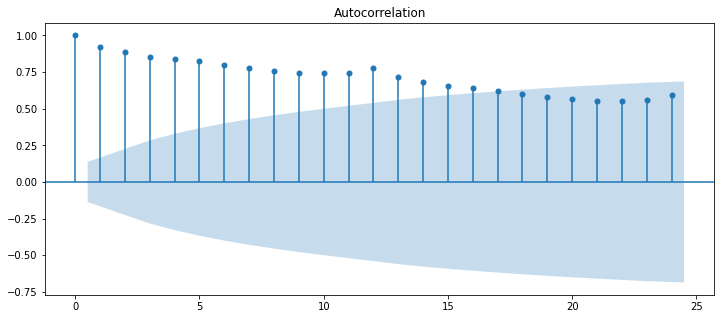

In [20]:
plt.rcParams.update({'figure.figsize':(12,5)})
# Plots lags on the horizontal and the correlations on vertical axis.
#partial autocorrelation function used to decide order of AR model
plot_pacf (data['value']);
# Auto Correlation Fuction used to decide order of MA model
plot_acf (data['value']);

In [21]:
from statsmodels.tsa.arima.model import ARIMA

In [22]:
204*.80

163.20000000000002

In [24]:
X_train=data.iloc[:163,:].values
X_test = data.iloc[163:,:].values
print(X_train.shape, X_test.shape)

(163, 1) (41, 1)


In [27]:
X_train

array([[ 3.526591  ],
       [ 3.180891  ],
       [ 3.252221  ],
       [ 3.611003  ],
       [ 3.565869  ],
       [ 4.306371  ],
       [ 5.088335  ],
       [ 2.81452   ],
       [ 2.985811  ],
       [ 3.20478   ],
       [ 3.127578  ],
       [ 3.270523  ],
       [ 3.73785082],
       [ 3.55877609],
       [ 3.77720173],
       [ 3.92449042],
       [ 4.38653092],
       [ 5.81054917],
       [ 6.19206769],
       [ 3.45085699],
       [ 3.77230686],
       [ 3.7343029 ],
       [ 3.90539892],
       [ 4.04968714],
       [ 4.31556552],
       [ 4.56218455],
       [ 4.60866203],
       [ 4.66785129],
       [ 5.09384145],
       [ 7.1799622 ],
       [ 6.73147308],
       [ 3.84127758],
       [ 4.39407557],
       [ 4.07534073],
       [ 4.5406449 ],
       [ 4.64561508],
       [ 4.75260653],
       [ 5.35060467],
       [ 5.20445484],
       [ 5.3016513 ],
       [ 5.77374216],
       [ 6.20459348],
       [ 6.74948382],
       [ 4.21606735],
       [ 4.94934946],
       [ 4

In [41]:
model = ARIMA(X_train, order=(2,1,1))
forecasted_model = model.fit()

In [45]:
forecasted_model.forecast(steps=1)

array([18.62225956])

In [43]:
X_test[0]

array([12.154552])

In [64]:
yhat =[]
for i in range(len(X_test)):
    X_train = data.iloc[i:i+163,:]
    model = ARIMA(X_train, order=(2,1,1), freq='MS')
    forecasted_model = model.fit()
    yhat.append(forecasted_model.forecast(steps=1))

C:\Users\Dell\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\Dell\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\Dell\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\Dell\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\Dell\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\Dell\A

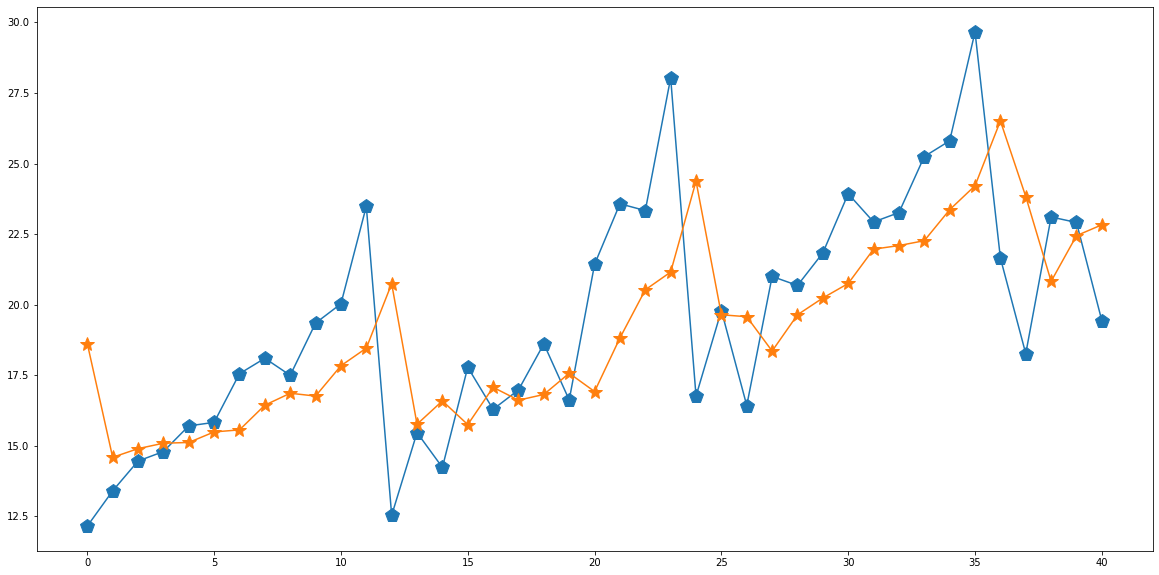

In [71]:
plt.figure(figsize=(20,10))
plt.plot(X_test, marker='p', ms=14, label="Original")
plt.plot(yhat, marker='*', ms=14, label="Predicted value")
plt.show()

In [62]:
from sklearn.metrics import mean_squared_error

In [65]:
mean_squared_error(X_test, yhat)

11.58732903618231

In [ ]:
# order=(1,1,0)
# mse = 12.75

# order=(2,1,1)
#mse 11.59